In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/")))

['Classroom', 'IMG_20190611_150607.jpg', 'IMG_20190611_150339.jpg', 'IMG_20190611_150411.jpg', 'IMG_20190611_150404.jpg', 'IMG_20190912_223735.jpg', 'IMG_20190912_223722.jpg', 'training-c.csv', 'CSE 3200', 'OnlineC1Temp', 'prioritySheduling.cpp', 'roundRobin.cpp', 'FB_IMG_1560243332619.jpg', '20626349_908169069324367_6531878284942323371_o (2) (1).jpg', 'Untitled form (1).gform', 'D043R.rar', 'Colab Notebooks', 'D043R (7).zip', 'D043R (6).zip', 'D043R (5).zip', 'Detailed Written Version Of The Creative Contents For YSSE Youth Ambassador Recruitment 2020 by Fardin Alam Shadhin.pdf', 'D043R (4).zip', 'D043R (3).zip', 'YSSE Demo.gsheet', 'DCom.pdf', 'D043R (2).zip', 'D043R (1).zip', 'D043R.zip', 'C1_170104119 (2).zip', '170104119 (1).zip', 'Presentation3Use-case (1).pdf', 'Presentation3Use-case.pdf', 'Group2_C1.pdf', '170104119.zip', 'C1_170104119 (1).zip', 'Login.rar', 'C1_170104119_FirstFit_worstFit_BestFit.zip', '170104119.pdf', 'C1_170104119.zip', 'UserDB_log.ldf', 'UserDB.mdf', 'C1_17

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/"

dataset_C = path + 'Dataset C.zip'
with ZipFile(dataset_C, 'r') as zip:
  zip.extractall()

In [ ]:
PATH = '/content/'
data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [ ]:
TRAIN_PATH = "/content/drive/My Drive/Train"
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = "/content/" + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-c')

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)



In [ ]:
batch_size = 20
num_iters = 20000
input_dim = 28*28 
num_hidden = 6 
output_dim = 10

learning_rate = 0.01  

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

16


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:972
Test dataloader:243


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas


In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=6, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=6, out_features=6, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=6, out_features=6, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=6, out_features=6, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=6, out_features=6, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=6, out_features=6, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=6, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

In [ ]:
iteration_loss = []
acc = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 2.299643039703369. Accuracy: 10.290183165260341
Epoch:  2
Iteration: 1000. Loss: 2.300184488296509. Accuracy: 9.63161144268368
Iteration: 1500. Loss: 2.318502187728882. Accuracy: 10.290183165260341
Epoch:  3
Iteration: 2000. Loss: 2.299276113510132. Accuracy: 10.290183165260341
Iteration: 2500. Loss: 2.306591510772705. Accuracy: 9.569870343692118
Epoch:  4
Iteration: 3000. Loss: 2.31643009185791. Accuracy: 10.104959868285656
Iteration: 3500. Loss: 2.3062214851379395. Accuracy: 9.919736571310969
Epoch:  5
Iteration: 4000. Loss: 2.299635410308838. Accuracy: 9.919736571310969
Iteration: 4500. Loss: 2.3084466457366943. Accuracy: 9.919736571310969
Epoch:  6
Iteration: 5000. Loss: 2.2909648418426514. Accuracy: 10.084379501955135
Iteration: 5500. Loss: 2.3201541900634766. Accuracy: 9.919736571310969
Epoch:  7
Iteration: 6000. Loss: 2.303091526031494. Accuracy: 10.084379501955135
Iteration: 6500. Loss: 2.30950927734375. Accuracy: 9.960897303972011
Epoch:  8
Iter

In [ ]:
#settings 1
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), path + 'assignment2_model.pkl') 

[2.299643039703369, 2.300184488296509, 2.318502187728882, 2.299276113510132, 2.306591510772705, 2.31643009185791, 2.3062214851379395, 2.299635410308838, 2.3084466457366943, 2.2909648418426514, 2.3201541900634766, 2.303091526031494, 2.30950927734375, 2.3026537895202637, 2.3019516468048096, 2.294377326965332, 2.318166732788086, 2.3051791191101074, 2.3011717796325684, 2.3072052001953125, 2.30485200881958, 2.308574676513672, 2.307220220565796, 2.3001580238342285, 2.312523603439331, 2.309614896774292, 2.2922136783599854, 2.3146326541900635, 2.295405864715576, 2.2966742515563965, 2.2944118976593018]


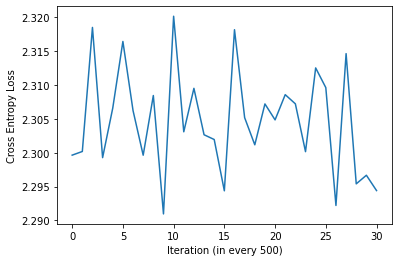

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
print("Final Model Loss: ",iteration_loss[-1])
print ("Final Model Accuracy: ",accuracy)

Final Model Loss:  2.2944118976593018
Final Model Accuracy:  9.919736571310969


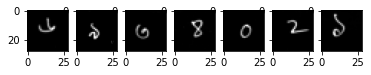

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 7)
for i in range(7):
    ax[i].imshow(images[i].view(28,28), cmap=matplotlib.cm.binary)

plt.show()